# Introduction to Data Science Course Final Project

> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>

<br>

# Jupyter Notebook Number 3
<i>Machine Learning</i>
<br>

<img src="images/ml2images.jpg" width="90%" height="auto" align="left">

# <i>Part 1 - Classification:</i>

In [188]:
# libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

the dataset I'm using for the classification problem is from:
https://www.kaggle.com/spscientist/students-performance-in-exams

### this dataset deals with different grades of students according to 3 topics:

1. math score
2. reading score
3. writing score

### this information we have about a student is:

1. gender
2. race/ethnicity
3. parental level of education
4. lunch
5. test preparation course

In [189]:
# import data:
students = pd.read_csv('data/StudentsPerformance.csv')

## <i>Learning about the data:</i>

In [190]:
# first five students:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## <i>Dataset Features:</i>
1. gender - the sex of the student (male or female)
2. race/ethnicity - the race/ethnicity of the student (groups) - (details on the groups below)
3. parental level of education - the parental level of education of the student (the parents of his) - (details on the groups below)
4. lunch - if the student ate a lunch before the exams
5. test preparation course - if the student take a test preparation course
6. math score
7. reading score
8. writing score

In [191]:
# checking if the data contains null data objects:
students.info()

# as we can see the data is clean of null data objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [192]:
# another check for finding null objects
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [193]:
# seeing the students scores widely
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [201]:
# adding the average score feature for each student with the average of math, reading and writing score
# the assign ,method is to change every average value in average target for each row
students = students.assign(average= lambda x: ((x['math score'] + x['reading score'] + x['writing score']) / 3.0))
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


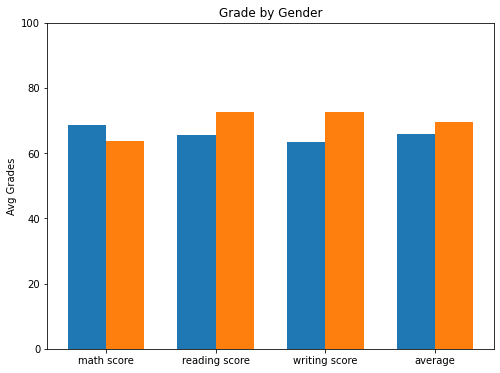

In [214]:
# ploting a bar plot with grades by genders (means):

# male will get a numpy array with the means of scores by male gender
male = np.array(students.groupby('gender').mean())[1]

# male will get a numpy array with the means of scores by female gender
female = np.array(students.groupby('gender').mean())[0]

# change the figure size of the bar plot
plt.figure(figsize=(8,6))

# ploting man scores means
plt.bar(np.arange(4), male, width, label='Men')

# ploting women scores means
plt.bar(np.arange(4) + width, female, width, label='Women')

# limit the axis from 0 to 100
plt.ylim(0,100)

# y label
plt.ylabel('Avg Grades')

# plot title
plt.title('Grade by Gender')

# x ticks
plt.xticks(ind + width / 2 ,('math score','reading score','writing score','average'))

plt.show()

In [218]:
# define a function that plot with a pie
def print_pie(values, lables):
    values = list(values)
    
    # get a objcet pie from matplotlib and a figure
    fig1, ax1 = plt.subplots()

    # set the size of the figure
    fig1.set_figheight(7)
    fig1.set_figwidth(7)

    # plot the pie
    # x - the parental level of education data
    # autopct - show the percentages at only one decimal point
    # shadow - show the shadow of the pie
    # startangle - rotate the pie in 90 degrees
    ax1.pie(values, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90)

    # equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')

    plt.show()

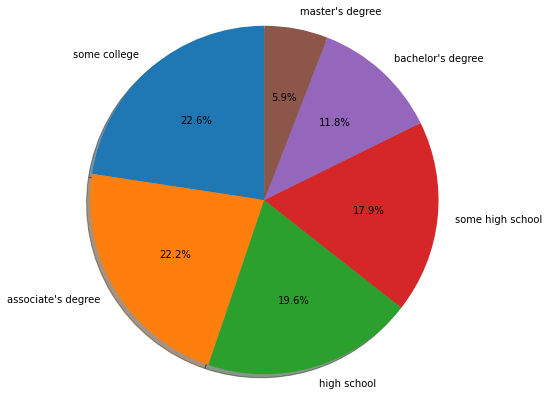

In [220]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = students['parental level of education'].value_counts()

# write all the type of values in parental level of education feature
parents_education = ['some college', 'associate\'s degree', 'high school',
                     'some high school', 'bachelor\'s degree', 'master\'s degree']

print_pie(values, parents_education)

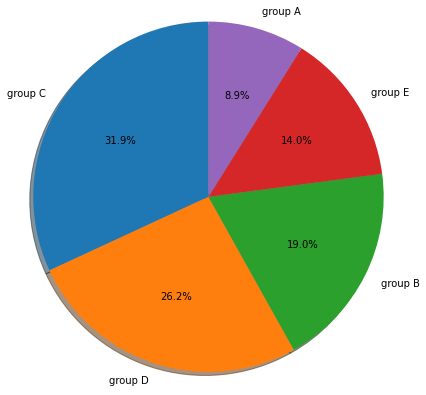

In [221]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = list(students['race/ethnicity'].value_counts())

# write all the type of values in parental level of education feature
ethnicity = ['group C', 'group D', 'group B', 'group E', 'group A']

print_pie(values, ethnicity)

# The goal of my machine learning model:

After the data preparation, I want to take for each student the three scores: math score, reading score and writing score and merge them to one feature by the mean of the three, this feature will called score.
After that process we have one feature called score and have a number value between 0 and 100, i want to classified the scores to three main classes:

1. outstanding (x >= 90)
2. pass (90 > x >= 60)
3. fail (60 > x)

Now, the goal of the model by a given a data of a student is to predict what is the status of the student, if the studet is fail, pass or outstanding in the tests score.

## <i>Preparing the data:</i>

In [222]:
# for preparing all the binary values of text (string objects) in the data set:
# I used the LabelEncoder from sklearn.preprocessing library,
# that helping me to convert all the binary values of texetual data to a numbers
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

# preparing the 'gender' feature to binary numbers (0 = female, 1 = male)
students['gender'] = lc.fit_transform(students['gender'])

# preparing the 'lunch' feature to binary numbers (0 = free/reduced	, 1 = standard)
students['lunch'] = lc.fit_transform(students['lunch'])

# preparing the 'lunch' feature to binary numbers (0 = completed, 1 = none)
students['test preparation course'] = lc.fit_transform(students['test preparation course'])

# showing results
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,group B,bachelor's degree,1,1,72,72,74,72.666667
1,0,group C,some college,1,0,69,90,88,82.333333
2,0,group B,master's degree,1,1,90,95,93,92.666667
3,1,group A,associate's degree,0,1,47,57,44,49.333333
4,1,group C,some college,1,1,76,78,75,76.333333


In [184]:
# create dummies varables for 'race/ethnicity' feature:
dummies_groups = pd.get_dummies(students['race/ethnicity'])
students = students.join(dummies_groups)
students = students.drop(columns=['race/ethnicity'])
students.head(10)

ValueError: columns overlap but no suffix specified: Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object')